In [1]:
import numpy as np
import pandas as pd
import scipy 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Grab and process the raw data.
amazon = open('amazon_cells_labelled.txt', mode = 'r+')
text = amazon.readlines()
print ('This file is {} lines long.'.format(len(text)))

This file is 1000 lines long.


In [3]:
df = pd.read_table('amazon_cells_labelled.txt', names=('Message', 'Sentiment'))

keywords = ['good', 'excellent', 'great', 'must have', 'impressed', 'quality', 'recommend', 'loved', 'best', 'ideal', 'well', 'nice', 'right', 'has', 'neat', 'love', 'reasonable', 'works', 'happy', 'cool', 'comfortable', 'beautiful', 'seamlessly', 'fast', 'simple', 'comfortably', 'pleased', 'brilliant', 'nicely']

# Note that we add spaces around the key so that we're getting the word,
# not just pattern matching.
for key in keywords:
    df[str(key)] = df.Message.str.contains(' ' + str(key) + ' ', case=False)

In [4]:
#  Turn the spam column into a boolean so we can easily do some statistics to prepare for modeling
df['Sentiment'] = (df['Sentiment'] == 1)

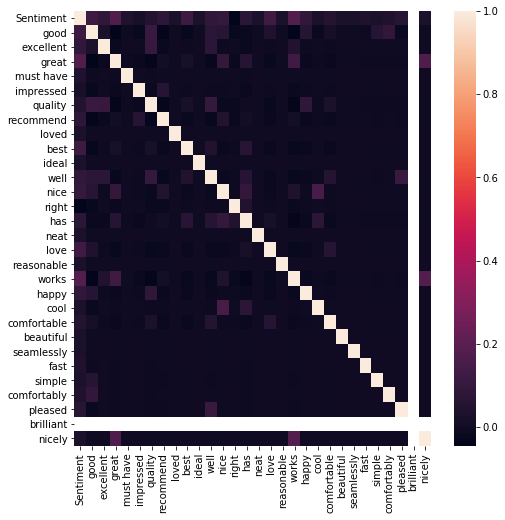

In [5]:
# Create a heatmap to check for independence between variables
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr())

In [6]:
# Define target and training variables
data = df[keywords]
target = df['Sentiment']

In [7]:
# Apply Naive Bayes model to training set and print accuracy
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

BernoulliNB(alpha=1.0, fit_prior=False, class_prior=None)

y_pred = bnb.predict(data)

print('Number of mislabeled points out of a total {} points : {}'.format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 331


My features are a compilation of kewyords that are explicitely identifiable with positive sentiments. The more keywords that are inlcuded, the more accurate the model predicts the data, but at a decreasing rate (like a square-root function).

In [8]:
# 1. Create keywords that identify positive sentiments
# 2. Turn Sentiment column into boolian
# 3. Create heatmap to make sure features are independent of eachother
# 4. Define training data: input data and outcome data(Target)
# 5. Review Success Metric
# 6. Improve model
# 386
# 348
# 336
# 331

In [9]:
# create confusion matrix to visualize errors
# negatives, positives

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[452,  48],
       [283, 217]])

In [10]:
# Check sensitivity and specificity

Sensitivity = (217/(283 + 217))*100
Specificity = (452/(452 + 48))*100
print('Sensitivity = ' + str(Sensitivity))
print('Specificity = ' + str(Specificity))

Sensitivity = 43.4
Specificity = 90.4


In [11]:
# Check for class imbalance

class_imbalance = df['Sentiment'].mean()
print('Class Imbalance = ' + str(class_imbalance))

Class Imbalance = 0.5


In [12]:
# Create hold out groups for crosstabing to check for over-fitting

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=30)
print('With 30% holdout: ' + str(bnb.fit(x_train, y_train).score(x_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 30% holdout: 0.6433333333333333
Testing on Sample: 0.669


In [13]:
# Cross Validation just to make sure theres no overfitting

from sklearn.model_selection import cross_val_score

cross_val_score(bnb, data, target, cv=5)

array([0.665, 0.675, 0.64 , 0.66 , 0.625])

In [14]:
# There is no overfitting.
# There is no class imbalance.
# Sensitivity = 43.4% and Specificity = 90.4%

# We need to imporve accuracy on identifying positives correctly.

- Remove correlated features, as the highly correlated features are voted twice in the model and it can lead to over inflating importance.
- Naive Bayes classifiers has limited options for parameter tuning like alpha=1 for smoothing, fit_prior=[True|False] to learn class prior probabilities or not and some other options (look at detail here). I would recommend to focus on your  pre-processing of data and the feature selection.

In [15]:
# Remove correlated features, as the highly correlated features are voted twice in the model and 
# it can lead to over inflating importance.

